# 1. Machine Learning Methods

In this notebook I'll be exploring the results of the following Machine Learning methods for our fraud detection problem using only their default settings:

* Logistic Regression
* Decision Tree
* Naive Bayes
* KNN

We'll be exploring how they compare against each other and these results will be used as a baseline to be compared against our better methods later

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedShuffleSplit, train_test_split


import fraudutils as futils
import warnings

warnings.filterwarnings(action='once')

%load_ext autoreload
%autoreload 2
%matplotlib inline

Our data will be loaded and then splitted into train and test using 80/20 ratio.

In [9]:
cc_df = pd.read_csv('../../../data/raw/give-me-some-credit/cs-training.csv')
del cc_df['Unnamed: 0']
cc_df = cc_df.fillna(0)
X_ = cc_df.drop(['SeriousDlqin2yrs'], axis=1)
y_ = cc_df['SeriousDlqin2yrs'].values

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=0, stratify=y_)

I'll be comparing classifiers the result of our classifiers applying undersampling and oversampling as shown bellow.

The metrics used below are accuracy, precision and recall, these are defined as:

$$Accuracy = \dfrac{TruePositive + TrueNegative}{TruePositive + FalsePositive + TrueNegative + FalseNegative}$$

$$Precision = \dfrac{TruePositive}{TruePositive + FalsePositive}$$

$$Recall = \dfrac{TruePositive}{TruePositive + TrueNegative}$$

In this analysis I'll be considering fraudulent examples as positives and non-fraudulents as negatives.

With the previous data split, we should have:

In [10]:
print("Train Data:")
print("Non-fraudulent: {}".format(len([x for x in y_train if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_train if x == 1])))

print("\nTest Data:")
print("Non-fraudulent: {}".format(len([x for x in y_test if x == 0])))
print("Fraudulent: {}".format(len([x for x in y_test if x == 1])))

Train Data:
Non-fraudulent: 111979
Fraudulent: 8021

Test Data:
Non-fraudulent: 27995
Fraudulent: 2005


In [11]:
c_scores = {}

### Running Classifiers

Logistic regression results:
Mean accuracy: 0.9338666666666666
Mean precision: 0.5766423357664233
Mean recall: 0.03940149625935162
AUPRC: 0.0869205708356845
AUROC: 0.5186648488619494


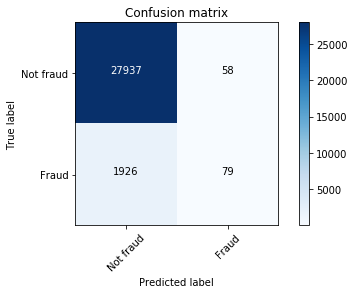

Decision tree results:
Mean accuracy: 0.8997666666666667
Mean precision: 0.26869806094182824
Mean recall: 0.2902743142144638
AUPRC: 0.12542947870397872
AUROC: 0.6168463908989805


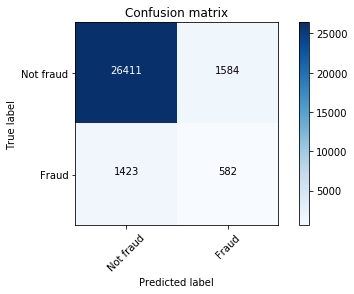

Naive Bayes results:
Mean accuracy: 0.9324333333333333
Mean precision: 0.39215686274509803
Mean recall: 0.0199501246882793
AUPRC: 0.07332357830912914
AUROC: 0.5088677217476046


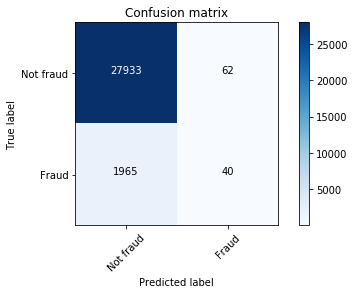

KNN results:
Mean accuracy: 0.9323666666666667
Mean precision: 0.39285714285714285
Mean recall: 0.021945137157107233
AUPRC: 0.07398797054981593
AUROC: 0.5097580659888056


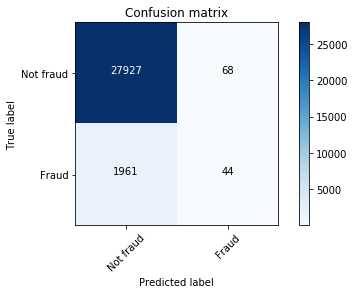

In [12]:
print("Logistic regression results:")
c_scores['logistic_regression'] = futils.classify(X_train, X_test, y_train, y_test, classifier=LogisticRegression, normalized=False)
print("Decision tree results:")
c_scores['decision_tree'] = futils.classify(X_train, X_test, y_train, y_test, classifier=DecisionTreeClassifier, normalized=False)
print("Naive Bayes results:")
c_scores['naive_bayes'] = futils.classify(X_train, X_test, y_train, y_test, classifier=GaussianNB, normalized=False)
print("KNN results:")
c_scores['knn'] = futils.classify(X_train, X_test, y_train, y_test, classifier=KNeighborsClassifier, normalized=False)

## Scores

In [13]:
scores = pd.DataFrame(c_scores)
scores

,logistic_regression,decision_tree,naive_bayes,knn
AUPRC,0.086921,0.125429,0.073324,0.073988
AUROC,0.518665,0.616846,0.508868,0.509758
accuracy,0.933867,0.899767,0.932433,0.932367
precision,0.576642,0.268698,0.392157,0.392857
recall,0.039401,0.290274,0.019950,0.021945
